# Libraries

In [174]:
import pandas as pd                     
import geopandas as gpd  # for geospatial data (shapes, GeoJSON)
import folium
from folium.features import GeoJsonPopup   
from folium import Choropleth
import json 
import matplotlib.pyplot as plt         
import matplotlib.colors as mcolors     # for color scaling and normalization
import matplotlib.cm as cm              # for colormaps and colorbars
from shapely.geometry import Point
import datetime
from geopandas import sjoin
!pip install holidays
import holidays
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.max_columns', None) 
sns.set_style("white")
sns.despine()
from math import pi


<Figure size 640x480 with 0 Axes>

In [127]:
import sys, folium, pandas as pd

print(f"Python: {sys.version}")
print(f"Folium: {folium.__version__}")
print(f"Pandas: {pd.__version__}")

Python: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 13:04:33) [Clang 14.0.6 ]
Folium: 0.19.6
Pandas: 2.2.3


In [128]:
# !conda config --add channels conda-forge
# !conda config --set channel_priority strict
# !conda install -y folium branca

# Dataframe

Load df1: dataframe ward with geometry data

In [129]:
df_wards = gpd.read_file("Wards_from_2022.geojson")
df_wards.head(3)

WARD    NAME           REP_NAME  \
0     8  Ward 8  Trayon White, Sr.   
1     6  Ward 6      Charles Allen   
2     7  Ward 7     Wendell Felder   

                                             WEB_URL       REP_PHONE  \
0  https://www.dccouncil.us/council/councilmember...  (202) 724-8045   
1  https://www.dccouncil.us/council/councilmember...  (202) 724-8072   
2          https://dccouncil.us/council/vincent-gray  (202) 724-8068   

             REP_EMAIL                                  REP_OFFICE WARD_ID  \
0  twhite@dccouncil.us  1350 Pennsylvania Ave, Suite 400, NW 20004       8   
1  callen@dccouncil.us  1350 Pennsylvania Ave, Suite 110, NW 20004       6   
2   vgray@dccouncil.us  1350 Pennsylvania Ave, Suite 406, NW 20004       7   

    LABEL STUSAB SUMLEV           GEOID GEOCODE STATE  OBJECTID  \
0  Ward 8     DC    610  610U600US11008   11008    11         1   
1  Ward 6     DC    610  610U600US11006   11006    11         2   
2  Ward 7     DC    610  610U600US11007   11007    11         3   

                                 GLOBALID CREATED_DATE  \
0  {E31550AE-6FAE-4B74-909F-52B283BFAF68}         None   
1  {765C4F49-9292-4BDB-AA24-39F4EE43359F}         None   
2  {73F07042-7D7F-452B-9BB3-0F87B0EC5418}         None   

           LAST_EDITED_DATE  SHAPEAREA  SHAPELEN  \
0                       NaT          0         0   
1 2023-12-08 01:08:04+00:00          0         0   
2 2025-01-13 23:24:46+00:00          0         0   

                                            geometry  
0  POLYGON ((-76.99392 38.87771, -77.00336 38.880...  
1  POLYGON ((-77.00908 38.87162, -77.00908 38.871...  
2  POLYGON ((-76.94186 38.91854, -76.942 38.91842...

In [130]:
df_wards.dtypes

WARD                              int32
NAME                             object
REP_NAME                         object
WEB_URL                          object
REP_PHONE                        object
REP_EMAIL                        object
REP_OFFICE                       object
WARD_ID                          object
LABEL                            object
STUSAB                           object
SUMLEV                           object
GEOID                            object
GEOCODE                          object
STATE                            object
OBJECTID                          int32
GLOBALID                         object
CREATED_DATE                     object
LAST_EDITED_DATE    datetime64[ms, UTC]
SHAPEAREA                         int32
SHAPELEN                          int32
geometry                       geometry
dtype: object

Remove columns

In [131]:
df_wards.drop(columns=['WARD', 'REP_NAME', 'WEB_URL', 'REP_PHONE', 'REP_EMAIL', 'REP_OFFICE', 'WARD_ID', 'LABEL', 'STUSAB', 'SUMLEV', 'GEOID', 'GEOCODE', 'STATE', 'OBJECTID', 'GLOBALID', 'CREATED_DATE', 'LAST_EDITED_DATE', 'SHAPEAREA', 'SHAPELEN'], inplace=True)
df_wards.head(3)

NAME                                           geometry
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...

Load df_social: dataframe with social values

In [132]:
df_social = pd.read_csv('Wards_from_2023_Poverty.csv', sep=';') # Gathering data
df_social.drop(columns=['WARD'], inplace=True)
df_social.head(3)

NAME  Poverty in %  Population  Bicycle in %  Worked at home in %  \
0  Ward 1          11.6       79373             6                   32   
1  Ward 2          11.2       78878             4                   33   
2  Ward 3           7.4       78404             2                   34   

   Bike Stations  Bike Stations Density per 1000 Resident  
0            165                                     2.08  
1            258                                     3.27  
2             69                                     0.88

Merge datasets: df1 + df_social

In [133]:
# Merge datasets
df_wards_social = df_wards.merge(df_social, left_on="NAME", right_on="NAME")
df_wards_social.head(8)

NAME                                           geometry  Poverty in %  \
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...          26.8   
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...          11.3   
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...          22.5   
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...          11.2   
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...          11.6   
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...          14.7   
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...           7.4   
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...           8.7   

   Population  Bicycle in %  Worked at home in %  Bike Stations  \
0       86509             1                   17             53   
1       84004             4                   33            171   
2       90898             1                   19             58   
3       78878             4                   33            258   
4       79373             6                   32            165   
5       88426             3                   30            131   
6       78404             2                   34             69   
7       85587             2                   30            164   

   Bike Stations Density per 1000 Resident  
0                                     0.61  
1                                     2.04  
2                                     0.64  
3                                     3.27  
4                                     2.08  
5                                     1.48  
6                                     0.88  
7                                     1.92

ajout du nombre de trajets en 2023 par wards

In [134]:
# Exemple : dictionnaire avec le nombre de trajets par ward
rides_dict = {"Ward 1": 516869, "Ward 2": 1483145, "Ward 3": 93226, "Ward 4": 75758, "Ward 5": 239193, "Ward 6": 890880, "Ward 7": 45699, "Ward 8": 65519}

# Ajouter une colonne 'Rides' en mappant les valeurs du dictionnaire
df_wards_social['Rides'] = df_wards_social['NAME'].map(rides_dict)


In [161]:
df_wards_social

NAME                                           geometry  Poverty in %  \
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...          26.8   
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...          11.3   
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...          22.5   
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...          11.2   
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...          11.6   
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...          14.7   
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...           7.4   
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...           8.7   

   Population  Bicycle in %  Worked at home in %  Bike Stations  \
0       86509             1                   17             53   
1       84004             4                   33            171   
2       90898             1                   19             58   
3       78878             4                   33            258   
4       79373             6                   32            165   
5       88426             3                   30            131   
6       78404             2                   34             69   
7       85587             2                   30            164   

   Bike Stations Density per 1000 Resident    Rides  Ward Number  \
0                                     0.61    65519            8   
1                                     2.04   890880            6   
2                                     0.64    45699            7   
3                                     3.27  1483145            2   
4                                     2.08   516869            1   
5                                     1.48   239193            5   
6                                     0.88    93226            3   
7                                     1.92    75758            4   

   Rides per Population  Casual  Member  Member per Population  \
0              0.757366   22650   42869               0.495544   
1             10.605209  314326  576554               6.863411   
2              0.502750   13815   31884               0.350767   
3             18.803025  605549  877596              11.125992   
4              6.511900  161004  355865               4.483452   
5              2.705008   81926  157267               1.778515   
6              1.189046   33603   59623               0.760459   
7              0.885158   26067   49691               0.580591   

   Casual per Population  
0               0.261822  
1               3.741798  
2               0.151984  
3               7.677033  
4               2.028448  
5               0.926492  
6               0.428588  
7               0.304567

In [136]:
df_wards_social.dtypes

NAME                                         object
geometry                                   geometry
Poverty in %                                float64
Population                                    int64
Bicycle in %                                  int64
Worked at home in %                           int64
Bike Stations                                 int64
Bike Stations Density per 1000 Resident     float64
Rides                                         int64
dtype: object

In [137]:
df_wards_social = df_wards_social.to_crs("EPSG:4326")

# Dataframe CBS_stations

In [138]:
CBS_stations_2022 = pd.read_csv("CBS_stations_2022.csv")
CBS_stations_2022=CBS_stations_2022[["start_station_name", "start_lat", "start_lng"]]
CBS_stations_2022


start_station_name  start_lat  start_lng
0                             Thomas Circle  38.905900 -77.032500
1                    4th St & Madison Dr NW  38.890496 -77.017246
2                       14th & Newton St NW  38.931991 -77.032956
3                           23rd & E St NW   38.896104 -77.049882
4                  S Glebe Rd & Potomac Ave  38.842600 -77.050200
..                                      ...        ...        ...
855            Fort Lincoln Dr & 33rd Pl NE  38.921641 -76.955687
856    South Dakota Ave & Bladensburg Rd NE  38.925200 -76.964896
857           South Dakota Ave & 33rd St NE  38.921986 -76.960696
858                          11th & O St NW  38.908094 -77.026975
859  37th & O St NW / Georgetown University  38.907693 -77.071512

[860 rows x 3 columns]

# Dataframe Washington DC social indicators 

In [139]:
df_full_social = pd.read_csv('Wards Social Indicators.csv', sep=';') # Gathering data
df_full_social = df_full_social.rename(columns={'Unnamed: 0': 'NAME'})
df_full_social.head(3)

NAME  Population   Median Age  Female in %  Income in $  Poverty in %  \
0     USA          NaN        38.7          NaN        43289          12.4   
1  Ward 1      79373.0        32.7         51.0        90065          11.6   
2  Ward 2      78878.0        33.6         51.0       104782          11.2   

   Transportation to work in min.  Renter of housing units in %  \
0                              27                           NaN   
1                              30                          64.0   
2                              25                          62.0   

   Bachelor’s degree or higher  Foreign-born population in %  
0                           35                          13.3  
1                           75                          19.3  
2                           86                          19.8

# Map Poverty Rate vs Bike Stations in Wards

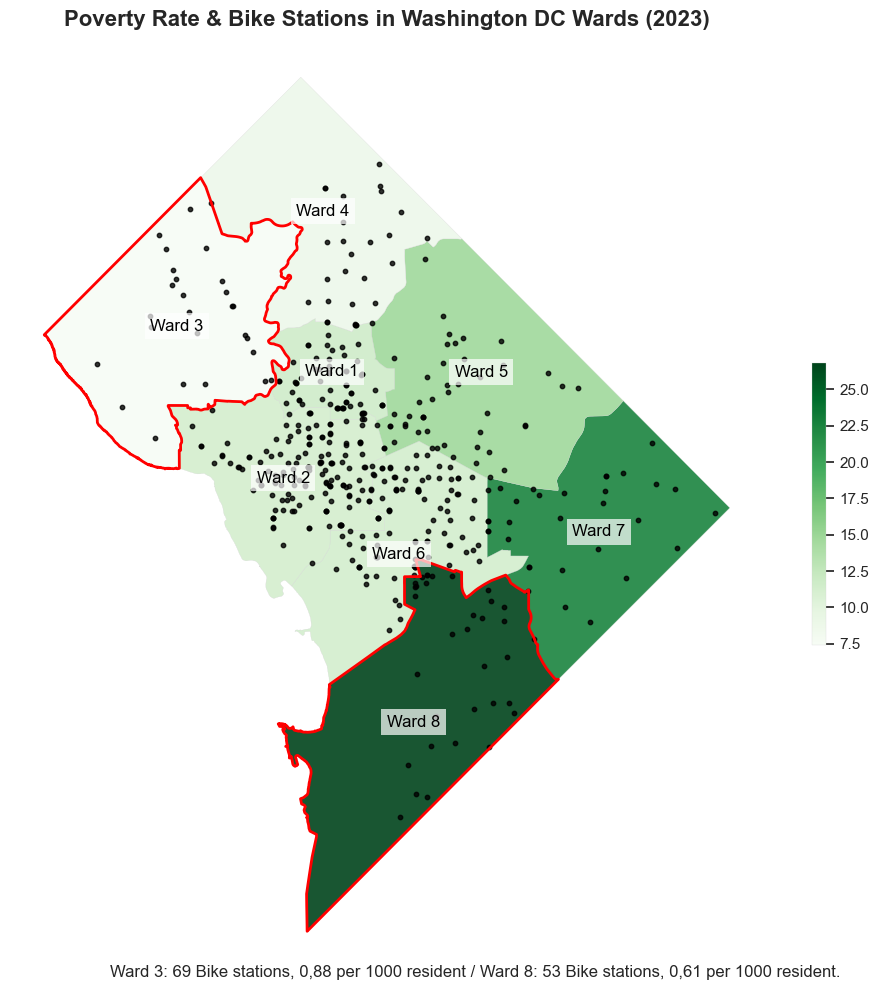

In [164]:
geometry = [Point(xy) for xy in zip(CBS_stations_2022['start_lng'], CBS_stations_2022['start_lat'])]
CBS_stations_2022 = gpd.GeoDataFrame(CBS_stations_2022, geometry=geometry, crs="EPSG:4326")  # WGS84

CBS_stations_in_wards = gpd.sjoin(CBS_stations_2022, df_wards_social, predicate='within', how='inner')

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
cmap = "Greens"
df_wards_social.plot(ax=ax, column="Poverty in %", cmap=cmap, edgecolor="lightgrey", linewidth=0.2, alpha=0.9)

norm = mcolors.Normalize(vmin=df_wards_social["Poverty in %"].min(), vmax=df_wards_social["Poverty in %"].max())
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

for idx, row in df_wards_social.iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, str(row['NAME']), fontsize=12, ha='center', va='center',
            color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.outline.set_edgecolor("lightgrey")
cbar.outline.set_linewidth(0.2)

# Plot only the bike stations within wards
CBS_stations_in_wards.plot(ax=ax, color="black", markersize=10, alpha=0.8)

# === Ajout : entourer les wards 3 et 8 en rouge ===
wards_to_highlight = df_wards_social[df_wards_social['NAME'].isin(["Ward 3", "Ward 8"])]
wards_to_highlight.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)

ax.set_title("Poverty Rate & Bike Stations in Washington DC Wards (2023)", fontsize=16, weight='bold', loc='center')
fig.text(0.5, 0.015, "Ward 3: 69 Bike stations, 0,88 per 1000 resident / Ward 8: 53 Bike stations, 0,61 per 1000 resident.", horizontalalignment="center")
plt.tight_layout()
plt.show()



In [160]:
station_counts = CBS_stations_in_wards['NAME'].value_counts().sort_index()
print(station_counts)


NAME
Ward 1     62
Ward 2    143
Ward 3     27
Ward 4     28
Ward 5     49
Ward 6     97
Ward 7     32
Ward 8     34
Name: count, dtype: int64


In [142]:
station_counts = df_wards_social['NAME'].value_counts().sort_index()
print(station_counts)


NAME
Ward 1    1
Ward 2    1
Ward 3    1
Ward 4    1
Ward 5    1
Ward 6    1
Ward 7    1
Ward 8    1
Name: count, dtype: int64


In [143]:
df_wards_social

NAME                                           geometry  Poverty in %  \
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...          26.8   
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...          11.3   
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...          22.5   
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...          11.2   
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...          11.6   
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...          14.7   
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...           7.4   
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...           8.7   

   Population  Bicycle in %  Worked at home in %  Bike Stations  \
0       86509             1                   17             53   
1       84004             4                   33            171   
2       90898             1                   19             58   
3       78878             4                   33            258   
4       79373             6                   32            165   
5       88426             3                   30            131   
6       78404             2                   34             69   
7       85587             2                   30            164   

   Bike Stations Density per 1000 Resident    Rides  
0                                     0.61    65519  
1                                     2.04   890880  
2                                     0.64    45699  
3                                     3.27  1483145  
4                                     2.08   516869  
5                                     1.48   239193  
6                                     0.88    93226  
7                                     1.92    75758

# Map Folium

Create a Map with Poverty Rate & Bike Stations Density in Wards (with filter fonction)

In [144]:
df_wards

NAME                                           geometry
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...

In [145]:
# Load GeoJSON file as a Python dictionary
with open ("Wards_from_2022.geojson") as json_file:
    df_wards_geojson = json.loads(json_file.read())

df_wards_geojson

{'type': 'FeatureCollection',
 'name': 'Wards_from_2022',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'WARD': 8,
    'NAME': 'Ward 8',
    'REP_NAME': 'Trayon White, Sr.',
    'WEB_URL': 'https://www.dccouncil.us/council/councilmember-trayon-white-sr',
    'REP_PHONE': '(202) 724-8045',
    'REP_EMAIL': 'twhite@dccouncil.us',
    'REP_OFFICE': '1350 Pennsylvania Ave, Suite 400, NW 20004',
    'WARD_ID': '8',
    'LABEL': 'Ward 8',
    'STUSAB': 'DC',
    'SUMLEV': '610',
    'GEOID': '610U600US11008',
    'GEOCODE': '11008',
    'STATE': '11',
    'OBJECTID': 1,
    'GLOBALID': '{E31550AE-6FAE-4B74-909F-52B283BFAF68}',
    'CREATED_DATE': None,
    'LAST_EDITED_DATE': None,
    'SHAPEAREA': 0,
    'SHAPELEN': 0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-76.99391635814753, 38.87770787939502],
      [-77.00335675450492, 38.88034379471702],
      [-77.00350857019625, 38.8803920127

In [146]:
# Fusionner avec tes données sociales
df_social["NAME"] = df_social["NAME"].str.strip()
gdf_merged = df_wards.merge(df_social, on="NAME", how="left")

# Créer la carte
f = folium.Figure(width=700, height=700)
m = folium.Map(location=[38.889805, -77.009056], zoom_start=11, tiles='CartoDB positron').add_to(f)

# Couches choroplèthes
choros = [
    ("Population", "Blues"),
    ("Poverty in %", "Reds"),
    ("Worked at home in %", "Greens"),
    ("Bike Stations Density per 1000 Resident", "Purples")
]

for i, (col, color) in enumerate(choros):
    folium.Choropleth(
        geo_data=gdf_merged,
        data=df_social,
        columns=["NAME", col],
        key_on="feature.properties.NAME",
        fill_color=color,
        nan_fill_opacity=0,
        name=col,
        legend_name=col,
        show=(i == 0)
    ).add_to(m)

# Ajouter popups avec les nouvelles propriétés fusionnées
popup_fields = [
    "NAME",
    "Population",
    "Poverty in %",
    "Worked at home in %",
    "Bike Stations Density per 1000 Resident"
]

popup_aliases = [
    "Ward:",
    "Population:",
    "Poverty (%):",
    "Worked at home (%):",
    "Bike stations / 1000 residents:"
]

geojson_layer = folium.GeoJson(
    data=gdf_merged,
    name="Wards Info",
    tooltip=folium.GeoJsonTooltip(
        fields=popup_fields,
        aliases=popup_aliases,
        localize=True,
        labels=True
    ),
    overlay=True,
    control=True  # pour qu'elle apparaisse dans le LayerControl
)

geojson_layer.add_to(m)

# Ajouter contrôle des couches
folium.LayerControl(collapsed=False).add_to(m)

m

Save the map

In [147]:
# Sauvegarde et affichage
m.save("dc_wards_map.html")
print("Carte enregistrée sous dc_wards_map.html")

Carte enregistrée sous dc_wards_map.html


# Transportation to work

Dataframe: Transportation to work

In [148]:
df_transport = pd.read_csv('Transportation to work.csv', sep=';') # Gathering data
df_transport.head(3)

NAME  Drove alone in %  Public transit in %  Carpooled in %  Walked in %  \
0  Ward 1                19                   26               3           12   
1  Ward 2                14                   16               2           28   
2  Ward 3                32                   20               3            6   

   Bicycle in %  Other in %  Worked at home in %  
0             6           2                   32  
1             4           3                   33  
2             2           2                   34

Plot: Transportation to work

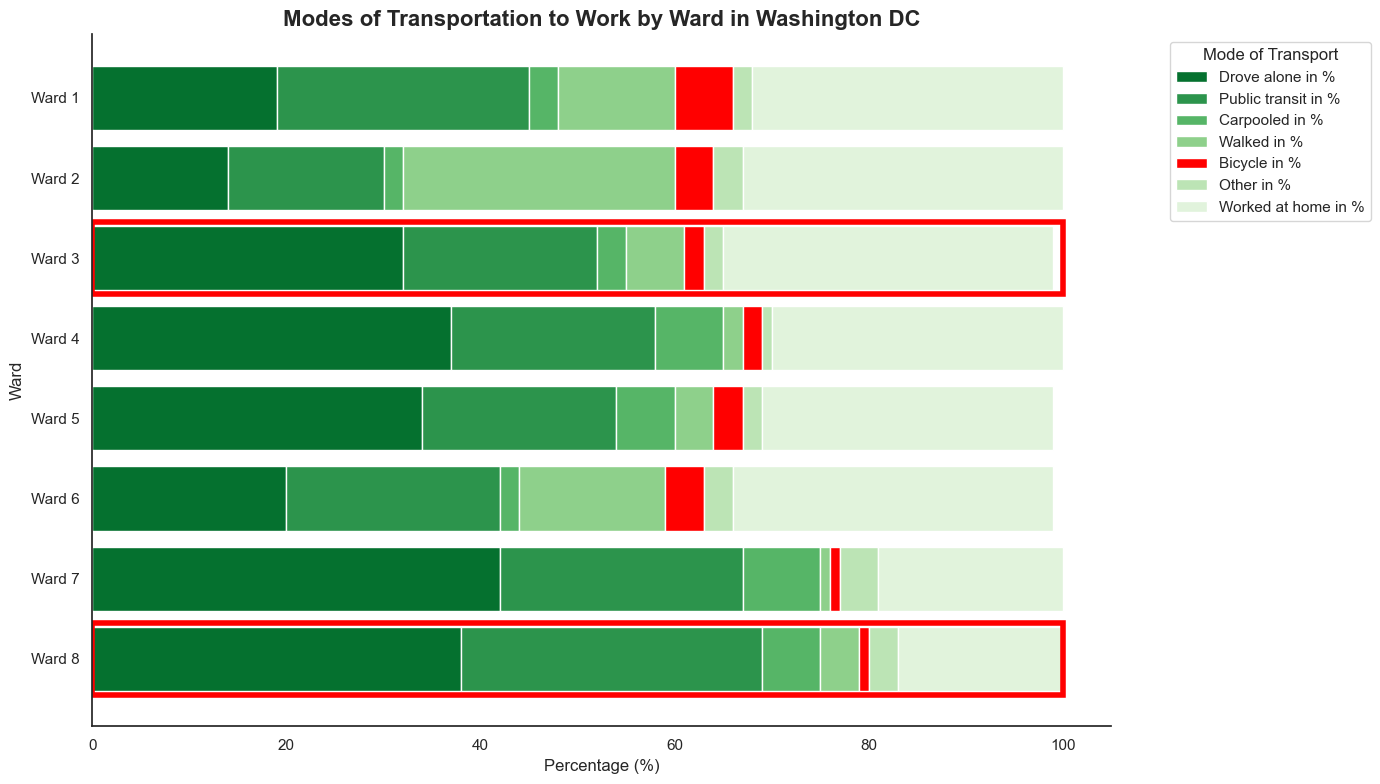

In [168]:
sns.set_style("white")

# Reclasser les Wards
ordered_wards = [f"Ward {i}" for i in range(1, 9)]
df_transport['NAME'] = pd.Categorical(df_transport['NAME'], categories=ordered_wards[::-1], ordered=True)
df_transport = df_transport.sort_values('NAME').reset_index(drop=True)

# Séparer les modes
transport_modes = [col for col in df_transport.columns if col != "NAME"]
modes_without_bike = [m for m in transport_modes if m != "Bicycle in %"]

# Palette verte inversée pour les autres
green_palette = sns.color_palette("Greens", n_colors=len(modes_without_bike))[::-1]

# Associer les couleurs
color_dict = {mode: green_palette[i] for i, mode in enumerate(modes_without_bike)}
color_dict["Bicycle in %"] = "red"

# Initialiser le graphique
fig, ax = plt.subplots(figsize=(14, 8))
bottom = [0] * len(df_transport)

# Tracer les barres
for mode in transport_modes:
    ax.barh(df_transport['NAME'], df_transport[mode], left=bottom,
            label=mode, color=color_dict.get(mode, "gray"))
    bottom = [i + j for i, j in zip(bottom, df_transport[mode])]

# Encadrés rouges
highlight_wards = ["Ward 3", "Ward 8"]
for i, ward in enumerate(df_transport['NAME']):
    if ward in highlight_wards:
        rect = plt.Rectangle((0, i - 0.45), 100, 0.9,
                             linewidth=4, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

# Étiquettes et titre
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Ward")
ax.set_title("Modes of Transportation to Work by Ward in Washington DC", fontsize=16, weight='bold', loc='center')
ax.legend(title="Mode of Transport", bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

plt.tight_layout()
plt.show()


# Corelation Heatmap for social data

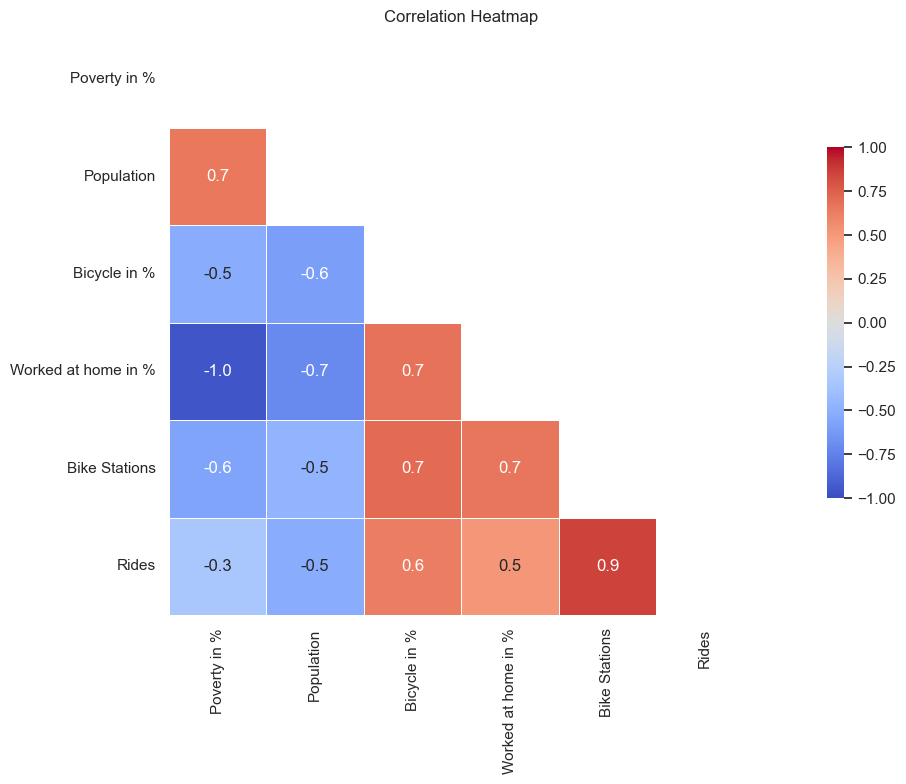

In [150]:
# 1. Supprimer la colonne non désirée
df_corr_input = df_wards_social.drop(columns=["Bike Stations Density per 1000 Resident", "NAME"])

# 2. Garder uniquement les colonnes numériques avec variance (au moins 2 valeurs différentes)
numeric_cols = df_corr_input.select_dtypes(include='number').columns
df_cleaned = df_corr_input[numeric_cols].loc[:, df_corr_input[numeric_cols].nunique() > 1]

# 3. Calcul de la matrice de corrélation
corr = df_cleaned.corr()

# 4. Masque pour triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# 5. Affichage
fig = plt.gcf()
fig.set_size_inches(15, 8)

ax = plt.axes()
sns.heatmap(
    data=corr,
    annot=True,
    ax=ax,
    fmt=".1f",
    linewidths=0.5,
    square=True,
    cmap="coolwarm",
    mask=mask,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.6},
    xticklabels=True,
    yticklabels=True
)

# 6. Noms sur l’axe Y horizontaux
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # 0° = horizontal
ax.set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Bike use by social indicators

/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_1521/2773283243.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


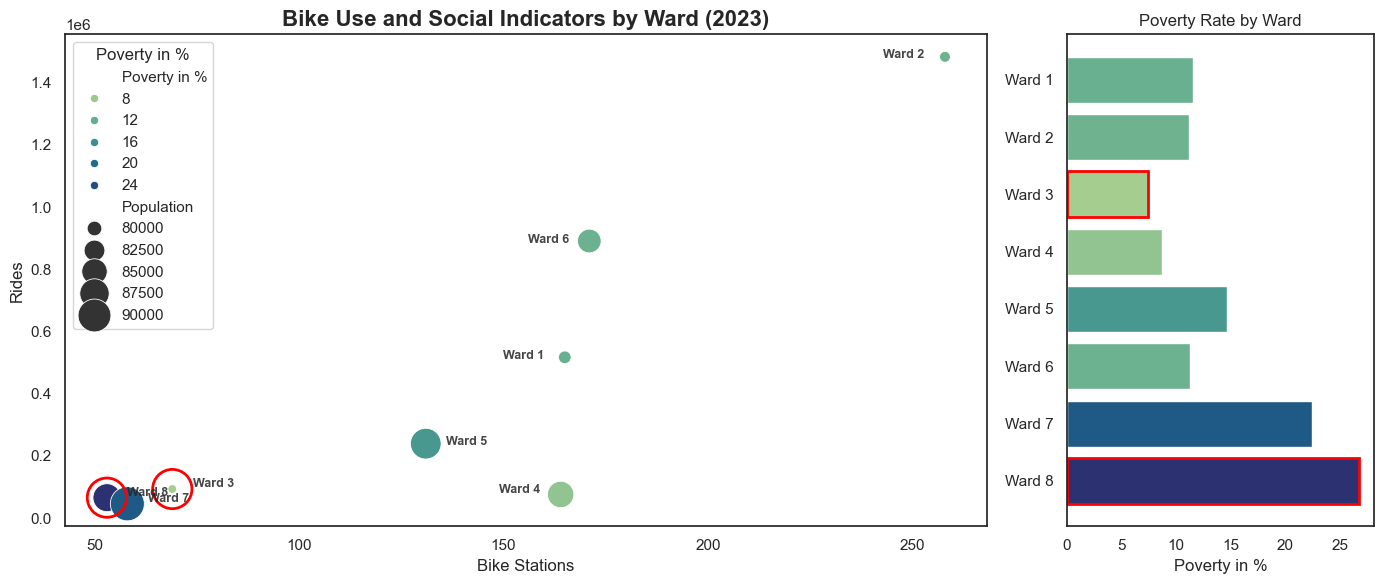

In [167]:
# Extraire le numéro du ward pour trier
df_wards_social["Ward Number"] = df_wards_social["NAME"].str.extract(r'(\d+)').astype(int)

# Trier pour le barplot
df_ordered = df_wards_social.sort_values("Ward Number") #.copy()

# Palette ordonnée pour le barplot
norm = plt.Normalize(df_ordered["Poverty in %"].min(), df_ordered["Poverty in %"].max())
colors = sns.color_palette("crest", as_cmap=True)(norm(df_ordered["Poverty in %"]))

# Appliquer un style seaborn
sns.set_theme(style="white")

# Créer les deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# === Graphique 1 : Scatterplot ===
sns.scatterplot(
    data=df_wards_social,
    x="Bike Stations", y="Rides",
    hue="Poverty in %", size="Population",
    palette="crest", sizes=(40, 600),
    ax=ax1
)

# Obtenir les médianes pour décider du quadrant
x_median = df_wards_social["Bike Stations"].median()
y_median = df_wards_social["Rides"].median()

# Positionner dynamiquement selon le quadrant
for _, row in df_wards_social.iterrows():
    x_offset = 5 if row["Bike Stations"] < x_median else -5
    y_offset = 5000 if row["Rides"] < y_median else -5000
    
    ax1.text(
        row["Bike Stations"] + x_offset,
        row["Rides"] + y_offset,
        row["NAME"],
        fontsize=9, fontweight='bold', alpha=0.85,
        ha='left' if x_offset > 0 else 'right'
    )


# Encadrer Ward 3 et 8 en rouge
for _, row in df_wards_social[df_wards_social["NAME"].isin(["Ward 3", "Ward 8"])].iterrows():
    ax1.scatter(
        row["Bike Stations"], row["Rides"],
        s=800, edgecolor="red", facecolor="none", linewidth=2
    )

ax1.set_title("Bike Use and Social Indicators by Ward (2023)", fontsize=16, weight='bold')
ax1.set_xlabel("Bike Stations")
ax1.set_ylabel("Rides")
ax1.legend(title="Poverty in %")

# === Graphique 2 : Barplot horizontal ===
# Barplot
sns.barplot(
    data=df_ordered, y="NAME", x="Poverty in %",
    palette="crest", ax=ax2
)

bars = ax2.barh(
    df_ordered.iloc[::-1]["NAME"], df_ordered.iloc[::-1]["Poverty in %"],
    color=colors[::-1]  # On inverse aussi les couleurs pour qu’elles restent associées aux bonnes valeurs
)


# Encadrer Ward 3 et 8
for i, name in enumerate(df_ordered.iloc[::-1]["NAME"]):
    if name in ["Ward 3", "Ward 8"]:
        bars[i].set_edgecolor("red")
        bars[i].set_linewidth(2)


ax2.set_title("Poverty Rate by Ward")
ax2.set_xlabel("Poverty in %")
ax2.set_ylabel("")

# Affichage final
plt.tight_layout()
plt.show()


# Number of ride per person per Ward

In [152]:
df_wards_social

NAME                                           geometry  Poverty in %  \
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...          26.8   
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...          11.3   
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...          22.5   
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...          11.2   
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...          11.6   
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...          14.7   
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...           7.4   
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...           8.7   

   Population  Bicycle in %  Worked at home in %  Bike Stations  \
0       86509             1                   17             53   
1       84004             4                   33            171   
2       90898             1                   19             58   
3       78878             4                   33            258   
4       79373             6                   32            165   
5       88426             3                   30            131   
6       78404             2                   34             69   
7       85587             2                   30            164   

   Bike Stations Density per 1000 Resident    Rides  Ward Number  
0                                     0.61    65519            8  
1                                     2.04   890880            6  
2                                     0.64    45699            7  
3                                     3.27  1483145            2  
4                                     2.08   516869            1  
5                                     1.48   239193            5  
6                                     0.88    93226            3  
7                                     1.92    75758            4

/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_1521/2789492136.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(
/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_1521/2789492136.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(


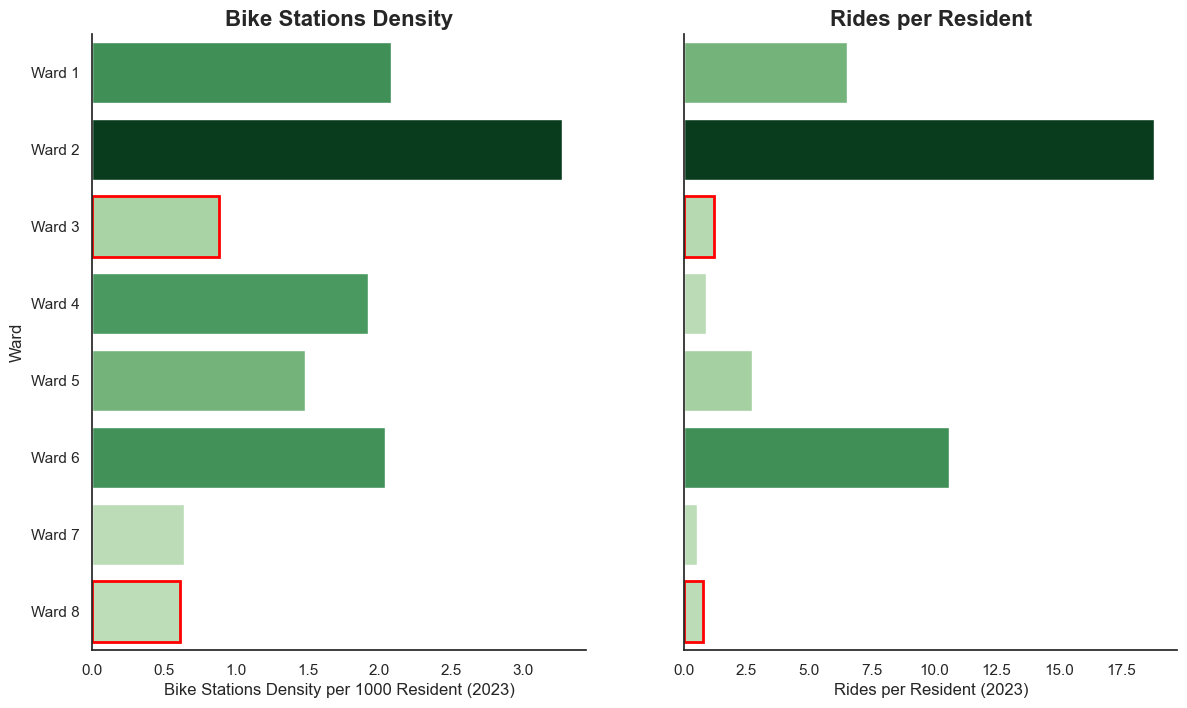

In [170]:
df_wards_social['Rides per Population'] = df_wards_social['Rides'] / df_wards_social['Population']

sns.set_style("white")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8), sharey=True)

df_ordered_for_plot = df_wards_social.sort_values(by="Ward Number", ascending=True)
ward_plot_order = df_ordered_for_plot["NAME"].tolist()

# Normaliser les valeurs pour la couleur
# Ensure the values are sorted according to `ward_plot_order` before mapping colors
def get_ordered_colors(df, value_col, order_col, palette_name="Greens"):
    # Create a temporary DataFrame sorted by the desired order
    temp_df = df.set_index("NAME").loc[order_col].reset_index()
    values = temp_df[value_col]

    norm = (values - values.min()) / (values.max() - values.min())
    base_palette = sns.color_palette(palette_name, n_colors=256)[int(0.3 * 256):]
    # Map normalized values to colors
    return [base_palette[int(x * (len(base_palette) - 1))] for x in norm]

# Generate colors based on the data ordered by 'Ward Number' for plotting
colors_density1 = get_ordered_colors(df_wards_social, "Bike Stations Density per 1000 Resident", ward_plot_order, "Greens")
colors_density2 = get_ordered_colors(df_wards_social, "Rides per Population", ward_plot_order, "Greens") 

# plot 1
bars1 = sns.barplot(
    data=df_wards_social,
    y="NAME", x="Bike Stations Density per 1000 Resident",
    ax=ax1,
    order=ward_plot_order,
    palette=colors_density1, # Custom ordered palette
    legend=False
)
ax1.set_title("Bike Stations Density", fontsize=16, weight='bold')
ax1.set_xlabel("Bike Stations Density per 1000 Resident (2023)")
ax1.set_ylabel("Ward")

# Encadrer Ward 3 et 8 en rouge
highlight_wards = ["Ward 3", "Ward 8"]
highlight_indices = [i for i, ward in enumerate(ward_plot_order) if ward in highlight_wards]

for i in highlight_indices:
    bar = ax1.patches[i]
    bar.set_edgecolor("red")
    bar.set_linewidth(2)


# plot 2
bars2 = sns.barplot(
    data=df_wards_social,
    y="NAME",
    x="Rides per Population",
    ax=ax2,
    order=ward_plot_order, # Maintain the same order as the first plot for easy comparison
    # REMOVED: hue="NAME" -- not needed when explicitly passing a palette list
    palette=colors_density2, # Custom ordered palette
    legend=False
)
ax2.set_title("Rides per Resident", fontsize=16, weight='bold')
ax2.set_xlabel("Rides per Resident (2023)")
ax2.set_ylabel("") # No y-label needed as y-axis is shared

# Encadrer Ward 3 et 8 en rouge
highlight_wards = ["Ward 3", "Ward 8"]

# Identifier les positions des wards à surligner dans l'ordre des barres
highlight_indices = [i for i, ward in enumerate(ward_plot_order) if ward in highlight_wards]

for i in highlight_indices:
    bar = ax2.patches[i]
    bar.set_edgecolor("red")
    bar.set_linewidth(2)



# Retirer les bordures
sns.despine()

# Réglage de la mise en page
plt.tight_layout
plt.show()

# Radar chart: Ward 3 & Ward 8

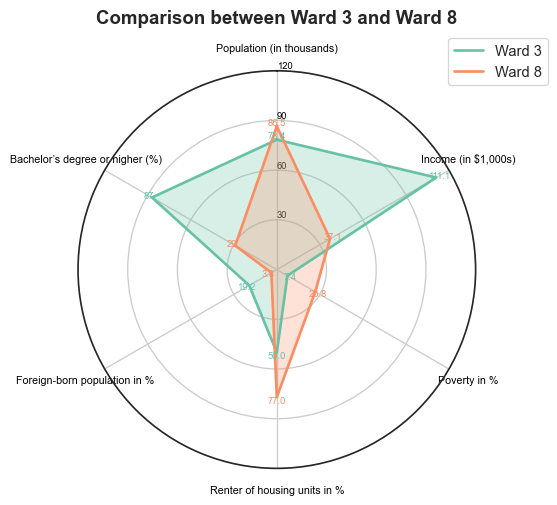

In [154]:

# Nettoyer les noms de colonnes
df_full_social.columns = df_full_social.columns.str.strip()

# Renommer les colonnes pour que les étiquettes soient explicites en anglais
df_full_social = df_full_social.rename(columns={
    "Population": "Population (in thousands)",
    "Income in $": "Income (in $1,000s)",
    "Bachelor’s degree or higher": "Bachelor’s degree or higher (%)"
})

# Catégories à tracer (avec noms mis à jour)
categories = [
    "Population (in thousands)", 
    "Income (in $1,000s)", 
    "Poverty in %", 
    "Renter of housing units in %", 
    "Foreign-born population in %", 
    "Bachelor’s degree or higher (%)"
]
N = len(categories)

# Filtrer uniquement Ward 3 et Ward 8
wards_to_plot = ["Ward 3", "Ward 8"]
df_subset = df_full_social[df_full_social["NAME"].isin(wards_to_plot)].reset_index(drop=True)

# Convertir la population et les revenus
df_subset["Population (in thousands)"] = df_subset["Population (in thousands)"] / 1000
df_subset["Income (in $1,000s)"] = df_subset["Income (in $1,000s)"] / 1000

# Préparation des angles
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Créer le radar chart
plt.figure(figsize=(6, 6), dpi=96)
ax = plt.subplot(111, polar=True)

# Axe en haut et sens horaire
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Ajouter les axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, color='black', size=8)

# Limites radiales
ax.set_rlabel_position(0)
plt.yticks([30, 60, 90, 120], ["30", "60", "90", "120"], color="black", size=7)
plt.ylim(0, 120)

# Palette de couleurs
colors = ['#66c2a5', '#fc8d62']  # Vert et orange

# Tracer les deux Wards
for i in range(2):
    values = df_subset.loc[i, categories].values.flatten().tolist()
    values += values[:1]
    name = df_subset['NAME'].iloc[i]
    
    ax.plot(angles, values, color=colors[i], linewidth=2, label=name)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

    # Ajouter les valeurs
    for j in range(N):
        val = round(values[j], 1)
        ax.text(angles[j], values[j] + 2, f"{val}", ha='center', va='center', fontsize=7, color=colors[i])

# Légende et titre
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Comparison between Ward 3 and Ward 8", fontsize=14, weight='bold', y=1.1)
plt.tight_layout()
plt.show()


# Plot Ratio: Casual/member per Resident

casual / member data 2023

In [155]:
# member_casual  casual  member
# NAME                         
# Ward 1         161004  355865
# Ward 2         605549  877596
# Ward 3          33603   59623
# Ward 4          26067   49691
# Ward 5          81926  157267
# Ward 6         314326  576554
# Ward 7          13815   31884
# Ward 8          22650   42869

compléter df_wards_social avec casual / member

In [156]:
# Exemple : dictionnaire avec le nombre de casual par ward
casual_dict = {"Ward 1": 161004, "Ward 2": 605549, "Ward 3": 33603, "Ward 4": 26067, "Ward 5": 81926, "Ward 6": 314326, "Ward 7": 13815, "Ward 8": 22650}

# Ajouter une colonne 'Rides' en mappant les valeurs du dictionnaire
df_wards_social['Casual'] = df_wards_social['NAME'].map(casual_dict)

In [157]:
# Exemple : dictionnaire avec le nombre de casual par ward
member_dict = {"Ward 1": 355865, "Ward 2": 877596, "Ward 3": 59623, "Ward 4": 49691, "Ward 5": 157267, "Ward 6": 576554, "Ward 7": 31884, "Ward 8": 42869}

# Ajouter une colonne 'Rides' en mappant les valeurs du dictionnaire
df_wards_social['Member'] = df_wards_social['NAME'].map(member_dict)

/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_1521/2360261875.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(
/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_1521/2360261875.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(


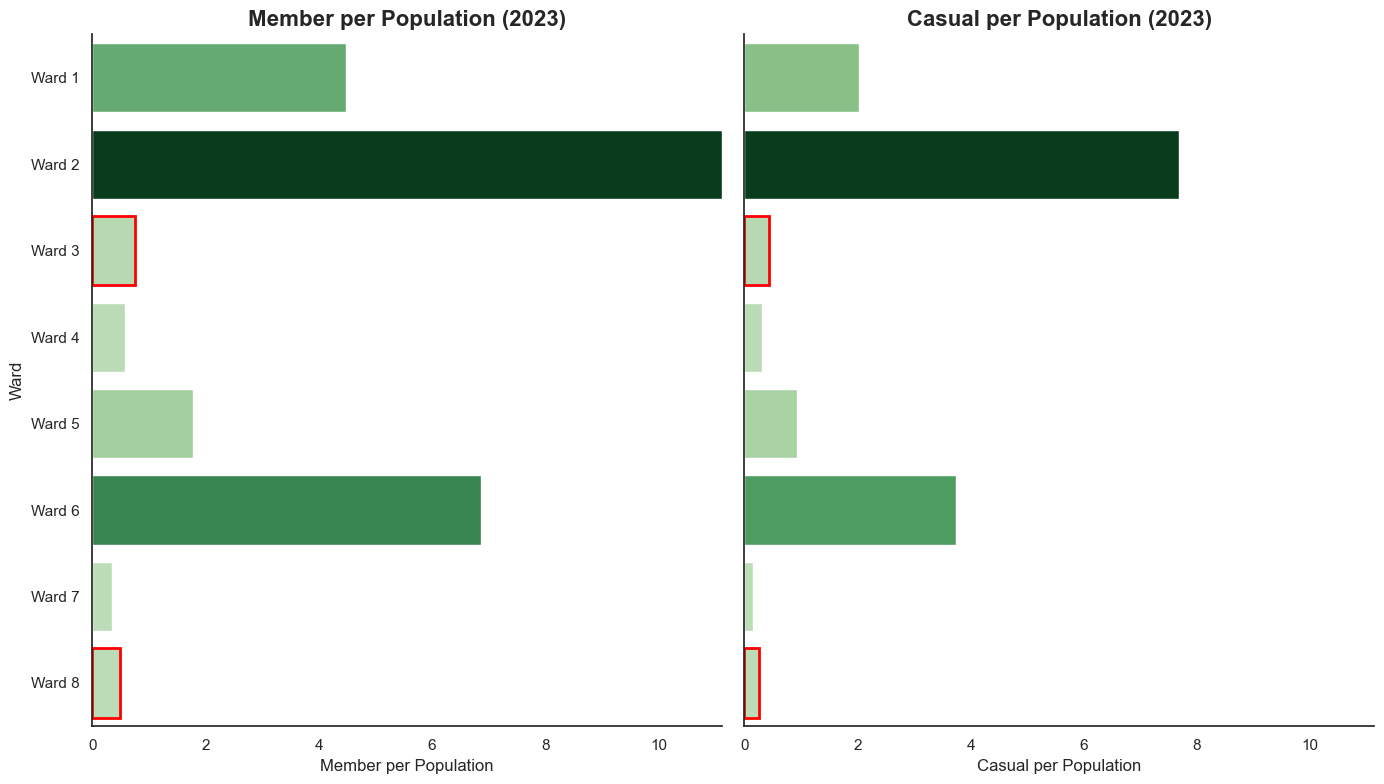

In [158]:
df_wards_social['Member per Population'] = df_wards_social['Member'] / df_wards_social['Population']
df_wards_social['Casual per Population'] = df_wards_social['Casual'] / df_wards_social['Population']

sns.set_style("white")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8), sharey=True)

df_ordered_for_plot = df_wards_social.sort_values(by="Ward Number", ascending=True)
ward_plot_order = df_ordered_for_plot["NAME"].tolist()

# Normaliser les valeurs pour la couleur
# Ensure the values are sorted according to `ward_plot_order` before mapping colors
def get_ordered_colors(df, value_col, order_col, palette_name="Greens"):
    # Create a temporary DataFrame sorted by the desired order
    temp_df = df.set_index("NAME").loc[order_col].reset_index()
    values = temp_df[value_col]

    norm = (values - values.min()) / (values.max() - values.min())
    base_palette = sns.color_palette(palette_name, n_colors=256)[int(0.3 * 256):]
    # Map normalized values to colors
    return [base_palette[int(x * (len(base_palette) - 1))] for x in norm]

# Generate colors based on the data ordered by 'Ward Number' for plotting
colors_density1 = get_ordered_colors(df_wards_social, "Member per Population", ward_plot_order, "Greens")
colors_density2 = get_ordered_colors(df_wards_social, "Casual per Population", ward_plot_order, "Greens") 

# plot 1
bars1 = sns.barplot(
    data=df_wards_social,
    y="NAME", x="Member per Population",
    ax=ax1,
    order=ward_plot_order,
    palette=colors_density1, # Custom ordered palette
    legend=False
)
ax1.set_title("Member per Population (2023)", fontsize=16, weight='bold')
ax1.set_xlabel("Member per Population")
ax1.set_ylabel("Ward")

# Encadrer Ward 3 et 8 en rouge
highlight_wards = ["Ward 3", "Ward 8"]
highlight_indices = [i for i, ward in enumerate(ward_plot_order) if ward in highlight_wards]

for i in highlight_indices:
    bar = ax1.patches[i]
    bar.set_edgecolor("red")
    bar.set_linewidth(2)


# plot 2
bars2 = sns.barplot(
    data=df_wards_social,
    y="NAME",
    x="Casual per Population",
    ax=ax2,
    order=ward_plot_order, # Maintain the same order as the first plot for easy comparison
    # REMOVED: hue="NAME" -- not needed when explicitly passing a palette list
    palette=colors_density2, # Custom ordered palette
    legend=False
)
ax2.set_title("Casual per Population (2023)", fontsize=16, weight='bold')
ax2.set_xlabel("Casual per Population")
ax2.set_ylabel("") # No y-label needed as y-axis is shared

# Encadrer Ward 3 et 8 en rouge
highlight_wards = ["Ward 3", "Ward 8"]

# Identifier les positions des wards à surligner dans l'ordre des barres
highlight_indices = [i for i, ward in enumerate(ward_plot_order) if ward in highlight_wards]

for i in highlight_indices:
    bar = ax2.patches[i]
    bar.set_edgecolor("red")
    bar.set_linewidth(2)



# Retirer les bordures
sns.despine()

# Définir les mêmes limites pour les deux axes x
max_val = max(df_wards_social["Member per Population"].max(), df_wards_social["Casual per Population"].max())
ax1.set_xlim(0, max_val)
ax2.set_xlim(0, max_val)

# Afficher le tout
plt.tight_layout()
plt.show()

In [159]:
df_wards_social

NAME                                           geometry  Poverty in %  \
0  Ward 8  POLYGON ((-76.99392 38.87771, -77.00336 38.880...          26.8   
1  Ward 6  POLYGON ((-77.00908 38.87162, -77.00908 38.871...          11.3   
2  Ward 7  POLYGON ((-76.94186 38.91854, -76.942 38.91842...          22.5   
3  Ward 2  POLYGON ((-77.0327 38.88262, -77.03236 38.8831...          11.2   
4  Ward 1  POLYGON ((-77.03523 38.93743, -77.0357 38.9374...          11.6   
5  Ward 5  POLYGON ((-76.99144 38.9573, -76.99163 38.9572...          14.7   
6  Ward 3  POLYGON ((-77.05808 38.95676, -77.05809 38.956...           7.4   
7  Ward 4  POLYGON ((-77.04097 38.99597, -77.07174 38.971...           8.7   

   Population  Bicycle in %  Worked at home in %  Bike Stations  \
0       86509             1                   17             53   
1       84004             4                   33            171   
2       90898             1                   19             58   
3       78878             4                   33            258   
4       79373             6                   32            165   
5       88426             3                   30            131   
6       78404             2                   34             69   
7       85587             2                   30            164   

   Bike Stations Density per 1000 Resident    Rides  Ward Number  \
0                                     0.61    65519            8   
1                                     2.04   890880            6   
2                                     0.64    45699            7   
3                                     3.27  1483145            2   
4                                     2.08   516869            1   
5                                     1.48   239193            5   
6                                     0.88    93226            3   
7                                     1.92    75758            4   

   Rides per Population  Casual  Member  Member per Population  \
0              0.757366   22650   42869               0.495544   
1             10.605209  314326  576554               6.863411   
2              0.502750   13815   31884               0.350767   
3             18.803025  605549  877596              11.125992   
4              6.511900  161004  355865               4.483452   
5              2.705008   81926  157267               1.778515   
6              1.189046   33603   59623               0.760459   
7              0.885158   26067   49691               0.580591   

   Casual per Population  
0               0.261822  
1               3.741798  
2               0.151984  
3               7.677033  
4               2.028448  
5               0.926492  
6               0.428588  
7               0.304567